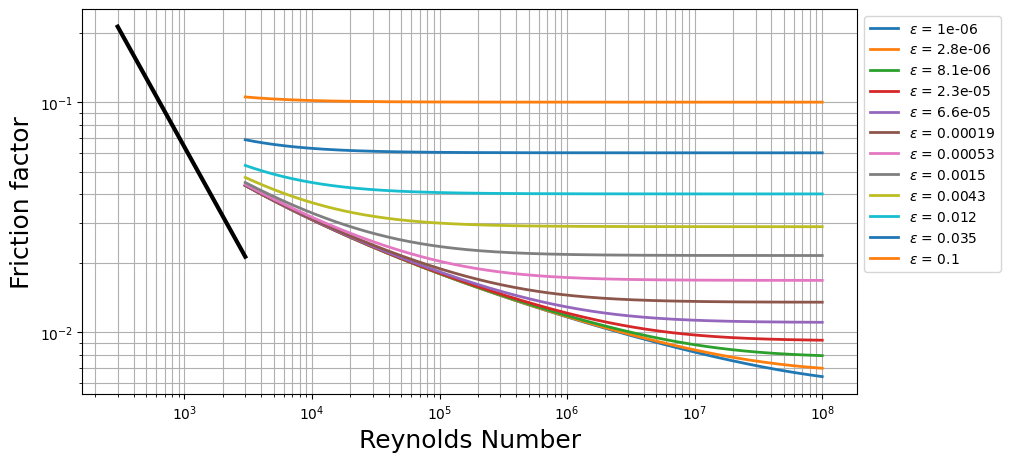

In [2]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root
import matplotlib.pyplot as plt
%matplotlib inline
Re1=np.logspace(np.log10(300),np.log10(3000),1000)
Re2=np.logspace(np.log10(3000),8,1000)
#solve for reyenolds greater/less than 3000
epsilon=np.array([1e-6,2.8e-6,8.1e-6,2.3e-5,6.6e-5,1.9e-4,5.3e-4,1.5e-3,
4.3e-3,1.2e-2,3.5e-2,1e-1]) #list of friction factors
f=[]
for j in Re1: #Reynolds<3000 or laminar flow
    f.append(64/j)
def moody(f,e,Re): #Reynolds >3000 
    return 1+2*np.sqrt(f)*np.log10((e/3.8)+(2.51/(Re*np.sqrt(f)))) 
#solve for turbulent flow
moodyvec=np.vectorize(moody) #vectorizing makes it more flexible
sol=[]
for j in Re2:
    sol.append(root(moodyvec,[0.01]*len(epsilon),args=(epsilon,j)).x) 
    #1st iteration with initial guess based on reynolds number 
sol=np.array(sol) #Arraying the solution
fig,axs=plt.subplots(1)
axs.loglog(Re1,f,'k',lw=3) 
axs.grid(which='both') #Grid
fig.set_size_inches(10,5)
axs.set_xlabel('Reynolds Number',fontsize=18)
axs.set_ylabel('Friction factor',fontsize=18)
for i,j in enumerate(epsilon): 
    #plot all solutions
    axs.loglog(Re2,sol[:,i],lw=2,label=r'$\epsilon$ = '+str(j)) 
#i iterates indices, j over epsilons and sol is plotted
axs.legend(bbox_to_anchor=[1.0,1])